# Hierarchical Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('kr_2.csv', sep=';')
df.head(20)

,RetailSpace,Type,NumberOfReviewInGoogle,The_average_number_of_units_in_the_check,human_traffic,AverageIncomeOfThePopulation,Stop_GT,The_final_stop_of_the_GT,Crosswalk,Specialized_bread,Success
0,0,0,42.820513,0,5211.000000,15610.000000,1,0,0,1,0
1,1,0,8.000000,1,2424.000000,12600.000000,1,1,0,0,0
2,2,1,42.820513,2,3868.000000,12600.000000,1,0,1,1,0
3,3,1,42.820513,3,4546.000000,13930.000000,1,0,0,1,0
4,1,1,42.820513,4,3244.000000,16030.000000,0,0,0,0,0
5,4,0,9.000000,5,2560.000000,12320.000000,0,0,0,1,0
6,5,0,21.000000,6,1842.000000,16100.000000,0,0,1,0,1
7,6,0,227.000000,7,412.000000,12180.000000,0,0,0,1,1
8,7,0,42.820513,8,233.000000,13930.000000,0,0,0,0,0
9,8,0,17.000000,9,978.000000,14560.000000,0,0,1,0,0


Итак, имеем задачу кластеризации. Конкретная задача была поставлена ранее, попробуем реализовать данную модель.

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['RetailSpace','Type','NumberOfReviewInGoogle','The_average_number_of_units_in_the_check','human_traffic','AverageIncomeOfThePopulation','Stop_GT','The_final_stop_of_the_GT','Crosswalk','Specialized_bread','Success']).round()

In [4]:
df

,RetailSpace,Type,NumberOfReviewInGoogle,The_average_number_of_units_in_the_check,human_traffic,AverageIncomeOfThePopulation,Stop_GT,The_final_stop_of_the_GT,Crosswalk,Specialized_bread,Success
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
65,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
66,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


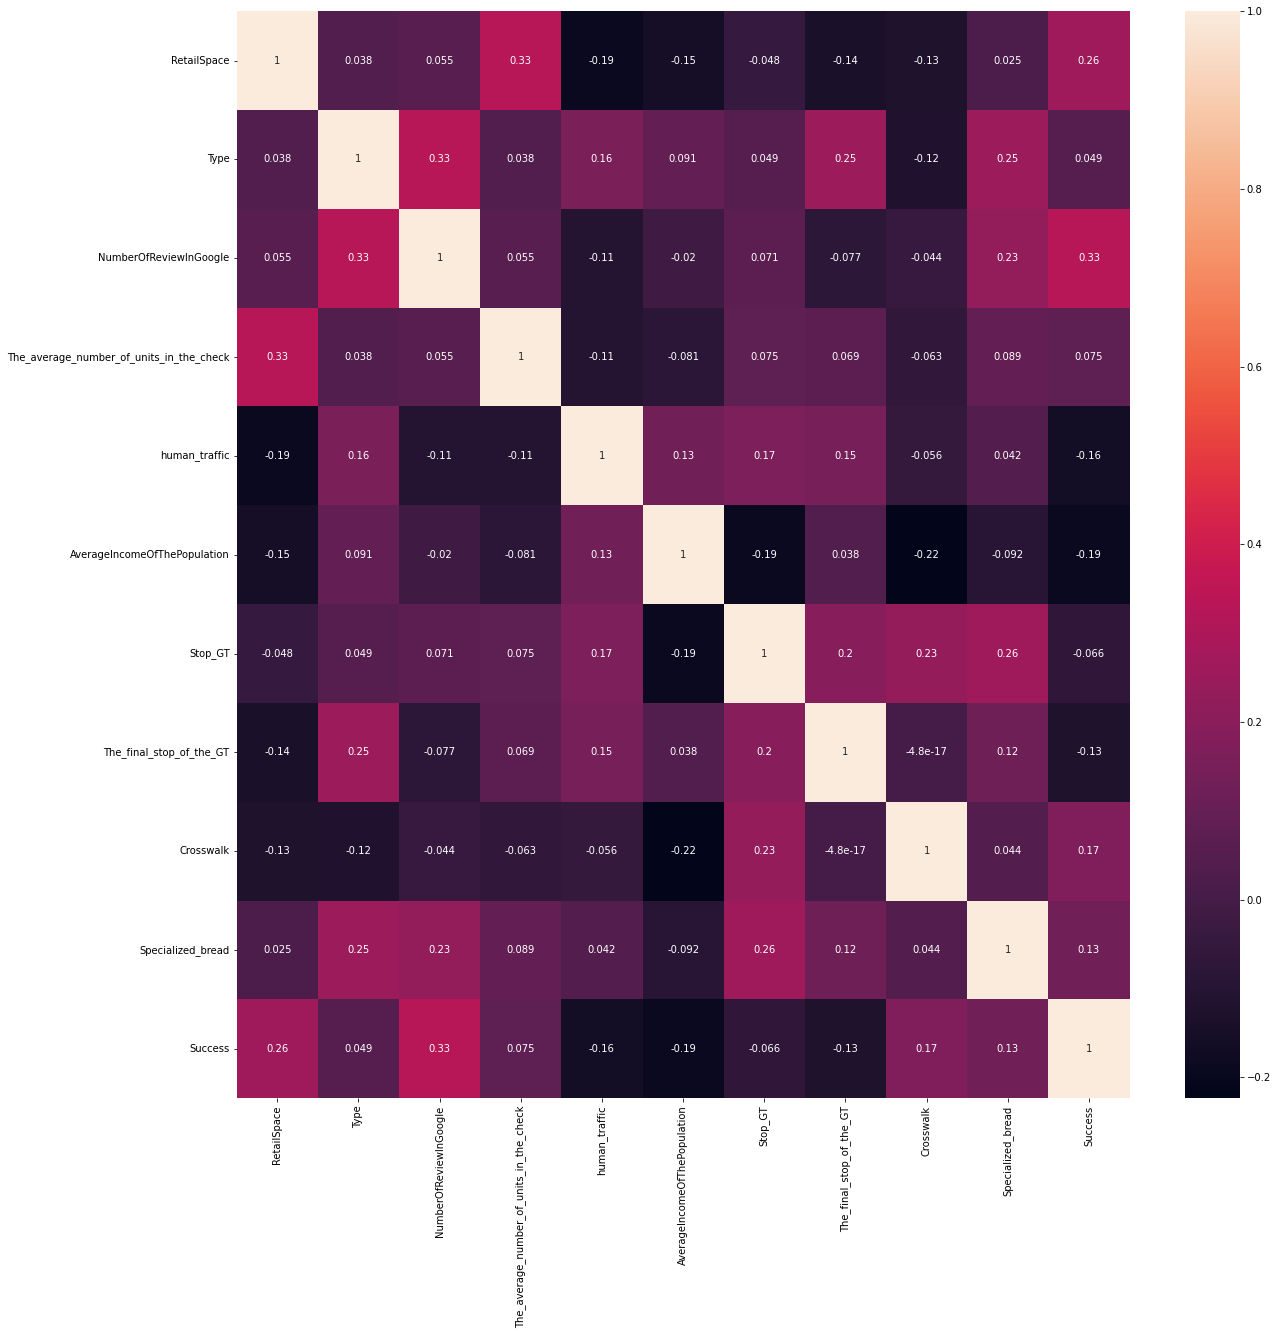

In [5]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

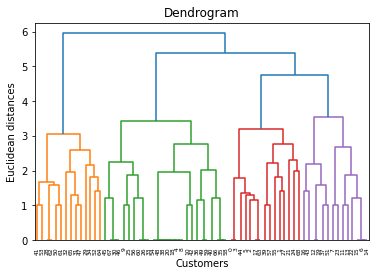

In [6]:
 #Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

По дендрограмме целесобразно выделить 4 кластера.

In [7]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [8]:
hc

array([1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 1, 2, 2, 1, 3, 3, 2, 3, 3, 2, 3, 2, 2, 0, 2, 1, 2, 3, 2, 0,
       1, 2, 2, 3, 2, 2, 3, 0, 3, 3, 2, 1, 2, 1, 2, 2, 2, 3, 3, 1, 3, 3,
       2, 2, 1], dtype=int64)

In [9]:
X_var = df.iloc[:, [0, 3, 5, 6, 8, 9, 10 ]]

In [10]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(X_var)

In [11]:
# Less features
X = df.iloc[:, [0, 5, 6, 8, 9]] 

Стоить напомнить, что при построении модели логистической регрессии были выявлены наиболее значимые переменные. Исходя из тех данных и построенной корреляционной матрицы отобраны значимые предикторы.

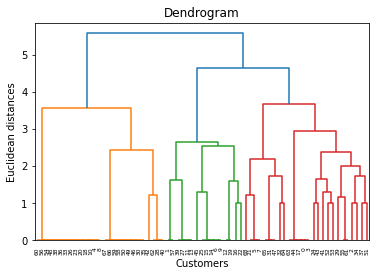

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Данная дендрограмма предлагает выделить 3 кластера (хотя длина ветки на 2 и 3 кластерах примерно одинаковая - для лучшей интерпретации целесообразно выделить 3 кластера).

In [13]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [14]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust-hc.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [15]:
# Export hc clusters
import pickle
obj = {'hc1': hc1}
output = open('clust-hc1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [16]:
# Export hc clusters
import pickle
obj = {'hc2': hc2}
output = open('clust-hc2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Таким образом, было построено несколько моделей, среди которых нужно отобрать оптимальную.

Разделение на 4 кластера по всем переменным. Здесь можно столкнуться с проблемой, что не все ядра кластером будут вариативны, поэтому в последствии придется некоторые переменные убирать с модели.


Разделение на 4 кластера по наиболее вариативным переменным.

Так же дополнительно было произведено разделение на 2 кластера соответсвенно на базе наиболее влиятельных переменных.

Чтобы определиться какая из предложенных моделей лучше - проведем дополнительно кластеризацию методом k-means и сравним результаты между собой.